### Code Hist.

 - CODE  
    &ensp; : Crawling - 특일 정보 조회 (KASI)

  - DATE  
    &ensp; 2023-11-29 Created  
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 1)   
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 2)    
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 3)   
    
 - DESC  
    &ensp; : 전처리 - 한국지역난방공사 열판매량/열공급량   
    &emsp; 1) 결측치가 없어서, 그대로 사용  
    &emsp;&ensp;&ensp; 
    &emsp;&ensp;&ensp; (Crawl Code 없음)   
    &emsp; 2) 

 - DATA  
    &emsp; <"Input">  
    1) None (Input Dataset)  
    &emsp;- Period :   
    &emsp;- Interval : 

    &emsp; <"Output">  
    1) Hourly (관측소/년도별 출력)  
    &nbsp;df_data_cal.to_csv(data_dir + 'KASI_DATE_D_Final.csv', index = False, encoding='utf-8-sig')  
    &emsp;- Columns : ['YEAR', 'MONTH', 'DAY'  
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;, 'dateKind', 'code_day_of_the_week', 'day_of_the_week'  
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;, 'rest_YN', 'name_of_holiday', 'dist_from_holiday']
    &emsp;- Period :   
    &emsp;- Interval :  
    
    2) Daily (관측소/년도별 출력)  
    &nbsp;df_data_cal_24.to_csv(data_dir + 'KASI_DATE_H_Final.csv', index = False, encoding='utf-8-sig')  
    &emsp;- Columns : ['locdate', 'YEAR', 'MONTH', 'DAY'  
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;, 'dateKind', 'code_day_of_the_week', 'day_of_the_week'  
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;, 'rest_YN', 'name_of_holiday', 'dist_from_holiday'  
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;, 'HOUR', 'MINUTE']
    &emsp;- Period :   
    &emsp;- Interval :  
    
    

 - Related Link  
    &ensp; : 

# 01. Code

## 01-01. Init

### 01-01-01. Init_Module Import

In [1]:
#region Basic_Import
## Basic
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import random
from pandas import DataFrame, Series

## Datetime
import time
import datetime as dt
from datetime import datetime, date, timedelta

import glob
from glob import glob
import requests
import json

## 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]

from scipy import stats

## TSNE
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

## 정규화
from sklearn.preprocessing import MinMaxScaler, StandardScaler
## PCA
from sklearn.decomposition import PCA

## Modeling, Model Training
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
## Model 평가
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score   # model.score   

## Excel/CSV
import openpyxl, xlrd

import urllib
from urllib.request import urlopen
from urllib.parse import urlencode, unquote, quote_plus

from selenium import webdriver
from selenium.webdriver.chrome.service import Service

from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

## Init.
pd.options.display.float_format = '{:.10f}'.format
#endregion Basic_Import

In [2]:
## Import_DL
str_tar = "tf"
## For Torch
if str_tar == "torch":
    import torch
    import torch.nn as nn
    from torch.nn.utils import weight_norm
    print("Torch Imported")
## For TF
elif str_tar == "tf":
    import tensorflow as tf
    import tensorflow_addons as tfa
    print("Tensorflow Imported")
else:
    print("Error : Cannot be used except for Keywords")
    print(" : torch / tf")

Tensorflow Imported


In [3]:
# !pip install lightgbm

## LGBM
import lightgbm as lgbm
from lightgbm import LGBMRegressor

## XGB
## https://magoker.tistory.com/106
import xgboost as xgb
from xgboost import plot_importance, plot_tree, XGBClassifier

In [4]:
## Import_Local (현재 프로그램에서 미사용)
from DEV_Common_Data_Visualization import visualization_df

### 01-01-02. Config (Directory, Params)

In [5]:
## Init_config
SEED = 42

np.random.seed(SEED)
tf.random.set_seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = "1"
random.seed(SEED)

In [6]:
## Define Todate str
str_now_ymd = pd.datetime.now().date()
str_now_y = pd.datetime.now().year
str_now_m = pd.datetime.now().month
str_now_d = pd.datetime.now().day
str_now_hr = pd.datetime.now().hour
str_now_min = pd.datetime.now().minute

print(pd.datetime.now())
print(str(str_now_y) + " / " + str(str_now_m)  + " / " + str(str_now_d))
print(str(str_now_hr) + " : " + str(str_now_min))

2023-12-29 11:54:13.089563
2023 / 12 / 29
11 : 54


## 01-02. Data Load (df_raw)

### 01-02-02. Weather_Temperature (PCA)

In [7]:
# Define data root directory
str_dir_kdhcHeat = "./data_Energy_KDHC_National_Heat/"
print(os.listdir(str_dir_kdhcHeat))

df_kdhc_heat = pd.read_csv(str_dir_kdhcHeat + 'KDHC_COMB_HEATxWEATHER_2019-2022.csv', index_col = 0)
# print(df_kdhc_heat.columns)
X = df_kdhc_heat[['temp_outdoor', 'temp_dew_point', 'temp_ground']]
X

['KDHC_COMB_HEAT-CJ_ASOS_KASI_2010-2023.csv', 'KDHC_COMB_HEATSxPCA01_2019-2022_Scaled.csv', 'KDHC_COMB_HEATxWEATHER_2019-2022.csv', 'KDHC_COMB_HEATxWEATHER_2019-2022_complete_analysis.csv', 'KDHC_COMB_HEATxWEATHER_2019-2022_linearReg.csv', 'KDHC_COMB_HEATxWEATHER_2019-2022_mean_imp.csv', 'KDHC_COMB_HEAT_2019-2022.csv', 'KDHC_COMB_KANGNAMHEATxWEATHER_2019-2022.csv', 'KDHC_HEAT', 'KDHC_HEAT.zip', 'KDHC_HEAT_19Region_hr.csv', 'KDHC_HEAT_CHEONGJU_2010_2021.csv', 'KDHC_HEAT_CHEONGJU_2010_2021_1st_Check.csv', 'KDHC_HEAT_SEJONG_2014_2018.csv', 'KDHC_HEAT_SEJONG_2014_2018_1st_Check.csv', 'KDHC_NATIONAL_HEAT_hr.csv', 'KDHC_NATIONAL_HEAT_RAW_hr.csv']


,temp_outdoor,temp_dew_point,temp_ground
0,17.6000000000,17.1000000000,17.0000000000
1,17.6000000000,17.1000000000,17.0000000000
2,17.1000000000,17.0000000000,16.7000000000
3,17.1000000000,17.0000000000,16.7000000000
4,16.4000000000,16.3000000000,16.3000000000
...,...,...,...
27298,19.2000000000,17.3000000000,19.8000000000
27299,18.8000000000,17.4000000000,18.5000000000
27300,18.2000000000,17.2000000000,17.6000000000
27301,17.5000000000,17.0000000000,16.9000000000


In [8]:
## Scaled
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled.shape)
# print(X_scaled)

## PCA
pca = PCA(n_components = 3)

## Scaled Data -> PCA Transformed Data
pca.fit(X_scaled)
x_pca = pca.transform(X_scaled)

print(f"스케일 데이터 shape: {X_scaled.shape}")
print(f"PCA 데이터 shape: {x_pca.shape}")

# PCA 데이터 프레임 생성
pca_columns=['pca_component_1', 'pca_component_2', 'pca_component_3']

df_pca = pd.DataFrame(x_pca, columns = pca_columns)
# iris_df_pca['target'] = x_pca.target

# Component 변동성 반영 비율 및 Feature
print(pca.explained_variance_ratio_)
print(df_pca.head(3))

(27303, 3)
스케일 데이터 shape: (27303, 3)
PCA 데이터 shape: (27303, 3)
[0.93146827 0.05974875 0.00878298]
   pca_component_1  pca_component_2  pca_component_3
0    -0.8509730008    -0.4342824626    -0.0533574957
1    -0.8509730008    -0.4342824626    -0.0533574957
2    -0.8029394114    -0.4490231060    -0.0754273954


In [9]:
df_kdhc_heat['temp_pca'] = df_pca['pca_component_1']

### 01-02-03. Weather_Air Pressure (PCA)

In [10]:
# Define data root directory
str_dir_kdhcHeat = "./data_Energy_KDHC_National_Heat/"
print(os.listdir(str_dir_kdhcHeat))

# df_kdhc_heat = pd.read_csv(str_dir_kdhcHeat + 'KDHC_COMB_HEATxWEATHER_2019-2022.csv', index_col = 0)
# print(df_kdhc_heat.columns)
X = df_kdhc_heat[['pressure_vapor', 'pressure_area', 'pressure_sea']]
X

['KDHC_COMB_HEAT-CJ_ASOS_KASI_2010-2023.csv', 'KDHC_COMB_HEATSxPCA01_2019-2022_Scaled.csv', 'KDHC_COMB_HEATxWEATHER_2019-2022.csv', 'KDHC_COMB_HEATxWEATHER_2019-2022_complete_analysis.csv', 'KDHC_COMB_HEATxWEATHER_2019-2022_linearReg.csv', 'KDHC_COMB_HEATxWEATHER_2019-2022_mean_imp.csv', 'KDHC_COMB_HEAT_2019-2022.csv', 'KDHC_COMB_KANGNAMHEATxWEATHER_2019-2022.csv', 'KDHC_HEAT', 'KDHC_HEAT.zip', 'KDHC_HEAT_19Region_hr.csv', 'KDHC_HEAT_CHEONGJU_2010_2021.csv', 'KDHC_HEAT_CHEONGJU_2010_2021_1st_Check.csv', 'KDHC_HEAT_SEJONG_2014_2018.csv', 'KDHC_HEAT_SEJONG_2014_2018_1st_Check.csv', 'KDHC_NATIONAL_HEAT_hr.csv', 'KDHC_NATIONAL_HEAT_RAW_hr.csv']


,pressure_vapor,pressure_area,pressure_sea
0,19.5000000000,1013.2000000000,1017.9000000000
1,19.5000000000,1013.2000000000,1017.9000000000
2,19.4000000000,1013.1000000000,1017.8000000000
3,19.4000000000,1013.1000000000,1017.8000000000
4,18.5000000000,1013.0000000000,1017.7000000000
...,...,...,...
27298,19.7000000000,1011.9000000000,1016.5000000000
27299,19.9000000000,1012.2000000000,1016.9000000000
27300,19.6000000000,1012.4000000000,1017.1000000000
27301,19.4000000000,1012.4000000000,1017.1000000000


In [11]:
## Scaled
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled.shape)
# print(X_scaled)

## PCA
pca = PCA(n_components = 3)

## Scaled Data -> PCA Transformed Data
pca.fit(X_scaled)
x_pca = pca.transform(X_scaled)

print(f"스케일 데이터 shape: {X_scaled.shape}")
print(f"PCA 데이터 shape: {x_pca.shape}")

# PCA 데이터 프레임 생성
pca_columns=['pca_component_1', 'pca_component_2', 'pca_component_3']

df_pca = pd.DataFrame(x_pca, columns = pca_columns)
# iris_df_pca['target'] = x_pca.target

# Component 변동성 반영 비율 및 Feature
print(pca.explained_variance_ratio_)
print(df_pca.head(3))

(27303, 3)
스케일 데이터 shape: (27303, 3)
PCA 데이터 shape: (27303, 3)
[8.98508117e-01 1.01468932e-01 2.29508673e-05]
   pca_component_1  pca_component_2  pca_component_3
0     0.2347392044    -0.6924422478     0.0004285759
1     0.2347392044    -0.6924422478     0.0004285759
2     0.2427216994    -0.6737360631     0.0003818462


In [12]:
df_kdhc_heat['pres_pca'] = df_pca['pca_component_1']

In [13]:
df_kdhc_heat.columns

Index(['METER_DATE', 'day_of_the_week', 'YEAR', 'MONTH', 'DAY', 'HOUR',
       'MINUTE', 'code_day_of_the_week', 'rest_YN', 'dist_from_holiday',
       'temp_outdoor', 'temp_dew_point', 'temp_ground', 'humidity', 'rainfall',
       'snowfall', 'snowfall_3hr', 'wind_speed', 'wind_direction',
       'pressure_vapor', 'pressure_area', 'pressure_sea', 'sunshine',
       'solar_radiation', 'cloud_total', 'cloud_midlow', 'visual_range',
       'PAJU', 'GOYANG', 'SAMSONG', 'JOONGANG', 'KANGNAM', 'PANGYO', 'BUNDANG',
       'YONGIN', 'GWANGGYO', 'SUWON', 'HWASUNG', 'DONGTAN', 'PYONGTAEK',
       'CHEONGJU', 'SEJONG', 'KIMHAE', 'DAEGU', 'YANGSAN', 'GWANGJU_JEONNAM',
       'temp_pca', 'pres_pca'],
      dtype='object')

### 01-02-01. KDHC Heat Usage (PCA Added)

In [14]:
# Define data root directory
str_dir_kdhcHeat = "./data_Energy_KDHC_National_Heat/"
print(os.listdir(str_dir_kdhcHeat))

# df_kdhc_heat = pd.read_csv(str_dir_kdhcHeat + 'KDHC_COMB_HEATxWEATHER_2019-2022.csv', index_col = 0)
print(df_kdhc_heat.columns)
df_kdhc_heat = df_kdhc_heat[['METER_DATE', 'YEAR', 'MONTH', 'DAY', 'code_day_of_the_week', 'day_of_the_week', 'rest_YN', 'dist_from_holiday'
                             , 'HOUR'
                             , 'temp_pca'
                             , 'humidity'
                             , 'rainfall', 'snowfall', 'snowfall_3hr'
                             , 'wind_speed', 'wind_direction'
                             , 'pres_pca'
                             , 'sunshine', 'solar_radiation'
                             , 'cloud_total', 'cloud_midlow'
                             , 'visual_range'
                             , 'PAJU', 'GOYANG', 'SAMSONG', 'JOONGANG'
                             , 'KANGNAM'
                             , 'PANGYO', 'BUNDANG', 'YONGIN', 'GWANGGYO', 'SUWON', 'HWASUNG', 'DONGTAN', 'PYONGTAEK', 'CHEONGJU', 'SEJONG'
                             , 'KIMHAE', 'DAEGU', 'YANGSAN', 'GWANGJU_JEONNAM']]

['KDHC_COMB_HEAT-CJ_ASOS_KASI_2010-2023.csv', 'KDHC_COMB_HEATSxPCA01_2019-2022_Scaled.csv', 'KDHC_COMB_HEATxWEATHER_2019-2022.csv', 'KDHC_COMB_HEATxWEATHER_2019-2022_complete_analysis.csv', 'KDHC_COMB_HEATxWEATHER_2019-2022_linearReg.csv', 'KDHC_COMB_HEATxWEATHER_2019-2022_mean_imp.csv', 'KDHC_COMB_HEAT_2019-2022.csv', 'KDHC_COMB_KANGNAMHEATxWEATHER_2019-2022.csv', 'KDHC_HEAT', 'KDHC_HEAT.zip', 'KDHC_HEAT_19Region_hr.csv', 'KDHC_HEAT_CHEONGJU_2010_2021.csv', 'KDHC_HEAT_CHEONGJU_2010_2021_1st_Check.csv', 'KDHC_HEAT_SEJONG_2014_2018.csv', 'KDHC_HEAT_SEJONG_2014_2018_1st_Check.csv', 'KDHC_NATIONAL_HEAT_hr.csv', 'KDHC_NATIONAL_HEAT_RAW_hr.csv']
Index(['METER_DATE', 'day_of_the_week', 'YEAR', 'MONTH', 'DAY', 'HOUR',
       'MINUTE', 'code_day_of_the_week', 'rest_YN', 'dist_from_holiday',
       'temp_outdoor', 'temp_dew_point', 'temp_ground', 'humidity', 'rainfall',
       'snowfall', 'snowfall_3hr', 'wind_speed', 'wind_direction',
       'pressure_vapor', 'pressure_area', 'pressure_sea', '

In [15]:
for i in range(0, len(df_kdhc_heat)):
    if df_kdhc_heat['rest_YN'].iloc[i] == 'N':
        df_kdhc_heat['rest_YN'].iloc[i] = 0
    elif df_kdhc_heat['rest_YN'].iloc[i] == 'Y':
        df_kdhc_heat['rest_YN'].iloc[i] = 1
df_kdhc_heat['rest_YN'] = df_kdhc_heat['rest_YN'].astype(int)

In [16]:
for i in range(0, len(df_kdhc_heat)):
    if df_kdhc_heat['dist_from_holiday'].iloc[i] == '제헌절':
        df_kdhc_heat['dist_from_holiday'].iloc[i] = 0
    # elif df_kdhc_heat['rest_YN'].iloc[i] == 'Y':
        # df_kdhc_heat['rest_YN'].iloc[i] = 1

df_kdhc_heat['dist_from_holiday'] = df_kdhc_heat['dist_from_holiday'].astype(int)

In [17]:
# Define data root directory
str_dir_kdhcHeat = "./data_Energy_KDHC_National_Heat/"
str_file = "KDHC_COMB_HEATSxPCA01_2019-2022_Scaled.csv"
print(os.listdir(str_dir_kdhcHeat))

df_kdhc_heat_scaled = pd.read_csv(str_dir_kdhcHeat + str_file, index_col = 0)
print(df_kdhc_heat_scaled .columns)
df_kdhc_heat_scaled

['KDHC_COMB_HEAT-CJ_ASOS_KASI_2010-2023.csv', 'KDHC_COMB_HEATSxPCA01_2019-2022_Scaled.csv', 'KDHC_COMB_HEATxWEATHER_2019-2022.csv', 'KDHC_COMB_HEATxWEATHER_2019-2022_complete_analysis.csv', 'KDHC_COMB_HEATxWEATHER_2019-2022_linearReg.csv', 'KDHC_COMB_HEATxWEATHER_2019-2022_mean_imp.csv', 'KDHC_COMB_HEAT_2019-2022.csv', 'KDHC_COMB_KANGNAMHEATxWEATHER_2019-2022.csv', 'KDHC_HEAT', 'KDHC_HEAT.zip', 'KDHC_HEAT_19Region_hr.csv', 'KDHC_HEAT_CHEONGJU_2010_2021.csv', 'KDHC_HEAT_CHEONGJU_2010_2021_1st_Check.csv', 'KDHC_HEAT_SEJONG_2014_2018.csv', 'KDHC_HEAT_SEJONG_2014_2018_1st_Check.csv', 'KDHC_NATIONAL_HEAT_hr.csv', 'KDHC_NATIONAL_HEAT_RAW_hr.csv']
Index(['METER_DATE', 'PAJU_s', 'GOYANG_s', 'SAMSONG_s', 'JOONGANG_s',
       'KANGNAM_s', 'PANGYO_s', 'BUNDANG_s', 'YONGIN_s', 'GWANGGYO_s',
       'SUWON_s', 'HWASUNG_s', 'DONGTAN_s', 'PYONGTAEK_s', 'CHEONGJU_s',
       'SEJONG_s', 'KIMHAE_s', 'DAEGU_s', 'YANGSAN_s', 'GWANGJU_JEONNAM_s',
       'pca_component_1', 'pca_component_2', 'pca_component_3

,METER_DATE,PAJU_s,GOYANG_s,SAMSONG_s,JOONGANG_s,KANGNAM_s,PANGYO_s,BUNDANG_s,YONGIN_s,GWANGGYO_s,...,PYONGTAEK_s,CHEONGJU_s,SEJONG_s,KIMHAE_s,DAEGU_s,YANGSAN_s,GWANGJU_JEONNAM_s,pca_component_1,pca_component_2,pca_component_3
0,2019-10-01 01:00:00,-0.7147964754,-0.8308263752,-1.4089350360,-0.9755030854,-0.9855209275,-1.2245448656,-0.8414230972,-1.1323359032,-1.2597788828,...,-1.0874523922,-0.9962839850,-1.2209819272,-0.8828028457,-0.9449895775,-0.9606640730,-1.2406363915,-4.5486431464,-0.8102644725,0.0480436434
1,2019-10-01 01:00:00,-0.7147964754,-0.8308263752,-1.4089350360,-0.9755030854,-0.9855209275,-1.2245448656,-0.8414230972,-1.1323359032,-1.2597788828,...,-1.0874523922,-0.9962839850,-1.2209819272,-0.8828028457,-0.9449895775,-0.9606640730,-1.2406363915,-4.5486431464,-0.8102644725,0.0480436434
2,2019-10-01 02:00:00,-0.8390127324,-0.8746698773,-1.3055171256,-0.9975373727,-0.9855209275,-1.3313932739,-0.8337886340,-1.1647685666,-1.5090492005,...,-1.0874523922,-1.0517008270,-1.2707243720,-0.9347358934,-0.9879187421,-0.9988638688,-1.3494879960,-4.7385097055,-0.9486422792,0.1341413624
3,2019-10-01 02:00:00,-0.8390127324,-0.8746698773,-1.3055171256,-0.9975373727,-0.9855209275,-1.3313932739,-0.8337886340,-1.1647685666,-1.5090492005,...,-1.0874523922,-1.0517008270,-1.2707243720,-0.9347358934,-0.9879187421,-0.9988638688,-1.3494879960,-4.7385097055,-0.9486422792,0.1341413624
4,2019-10-01 03:00:00,-0.8638559838,-0.9130329416,-1.3055171256,-1.0085545164,-1.0124515233,-1.3046811719,-0.8762023186,-1.2101742953,-1.3666090189,...,-1.0874523922,-1.1071176691,-1.2707243720,-0.9347358934,-1.0022284637,-1.0370636646,-1.2406363915,-4.7505418230,-0.8333600392,0.0807661015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27298,2022-09-30 20:00:00,-0.1930881958,-0.7869828732,-0.4781738426,-0.7000744938,-0.6693557326,-0.4498939052,-0.6777062746,-0.7626035408,-0.3339177028,...,1.0798808470,-0.6268383713,-0.7898807393,-0.6750706549,-0.7875826404,-0.6550657067,-0.9140815780,-2.3798343863,0.7682451798,1.3599420785
27299,2022-09-30 21:00:00,-0.2179314472,-0.7376589333,-0.4264648874,-0.6890573502,-0.7124446859,-0.4766060073,-0.6437753269,-0.7366574101,-0.8680683836,...,-0.4278292324,-0.7376720554,-0.7898807393,-0.7270037026,-0.7160340326,-0.5022665235,-1.0229331825,-2.7885250626,-0.1286691027,0.2426072679
27300,2022-09-30 22:00:00,-0.2924612014,-0.7102567445,-0.6074462305,-0.7110916375,-0.8040087117,-0.7971512323,-0.7540509069,-0.8015227369,-1.1885587920,...,-0.8047567523,-0.7930888975,-0.8064615542,-0.6750706549,-0.7589631973,-0.5022665235,-0.9140815780,-3.1819057640,-0.5824119183,0.1296520362
27301,2022-09-30 23:00:00,-0.4166774585,-0.6938154313,-0.7108641409,-0.7441430685,-0.8363254267,-0.9307117427,-0.8728092239,-0.8080092695,-1.1885587920,...,-0.6162929924,-0.8300334588,-0.8562039990,-0.7270037026,-0.7303437542,-0.5022665235,-0.9140815780,-3.3753256983,-0.6003969781,0.3196417328


In [18]:
df_kdhc_heat_comb = pd.merge(df_kdhc_heat, df_kdhc_heat_scaled
                             , how = 'left', on = ['METER_DATE'])
print(df_kdhc_heat_comb.columns)
df_kdhc_heat_comb

Index(['METER_DATE', 'YEAR', 'MONTH', 'DAY', 'code_day_of_the_week',
       'day_of_the_week', 'rest_YN', 'dist_from_holiday', 'HOUR', 'temp_pca',
       'humidity', 'rainfall', 'snowfall', 'snowfall_3hr', 'wind_speed',
       'wind_direction', 'pres_pca', 'sunshine', 'solar_radiation',
       'cloud_total', 'cloud_midlow', 'visual_range', 'PAJU', 'GOYANG',
       'SAMSONG', 'JOONGANG', 'KANGNAM', 'PANGYO', 'BUNDANG', 'YONGIN',
       'GWANGGYO', 'SUWON', 'HWASUNG', 'DONGTAN', 'PYONGTAEK', 'CHEONGJU',
       'SEJONG', 'KIMHAE', 'DAEGU', 'YANGSAN', 'GWANGJU_JEONNAM', 'PAJU_s',
       'GOYANG_s', 'SAMSONG_s', 'JOONGANG_s', 'KANGNAM_s', 'PANGYO_s',
       'BUNDANG_s', 'YONGIN_s', 'GWANGGYO_s', 'SUWON_s', 'HWASUNG_s',
       'DONGTAN_s', 'PYONGTAEK_s', 'CHEONGJU_s', 'SEJONG_s', 'KIMHAE_s',
       'DAEGU_s', 'YANGSAN_s', 'GWANGJU_JEONNAM_s', 'pca_component_1',
       'pca_component_2', 'pca_component_3'],
      dtype='object')


,METER_DATE,YEAR,MONTH,DAY,code_day_of_the_week,day_of_the_week,rest_YN,dist_from_holiday,HOUR,temp_pca,...,PYONGTAEK_s,CHEONGJU_s,SEJONG_s,KIMHAE_s,DAEGU_s,YANGSAN_s,GWANGJU_JEONNAM_s,pca_component_1,pca_component_2,pca_component_3
0,2019-10-01 01:00:00,2019,10,1,1,Tuesday,0,2,1,-0.8509730008,...,-1.0874523922,-0.9962839850,-1.2209819272,-0.8828028457,-0.9449895775,-0.9606640730,-1.2406363915,-4.5486431464,-0.8102644725,0.0480436434
1,2019-10-01 01:00:00,2019,10,1,1,Tuesday,0,2,1,-0.8509730008,...,-1.0874523922,-0.9962839850,-1.2209819272,-0.8828028457,-0.9449895775,-0.9606640730,-1.2406363915,-4.5486431464,-0.8102644725,0.0480436434
2,2019-10-01 01:00:00,2019,10,1,1,Tuesday,0,2,1,-0.8509730008,...,-1.0874523922,-0.9962839850,-1.2209819272,-0.8828028457,-0.9449895775,-0.9606640730,-1.2406363915,-4.5486431464,-0.8102644725,0.0480436434
3,2019-10-01 01:00:00,2019,10,1,1,Tuesday,0,2,1,-0.8509730008,...,-1.0874523922,-0.9962839850,-1.2209819272,-0.8828028457,-0.9449895775,-0.9606640730,-1.2406363915,-4.5486431464,-0.8102644725,0.0480436434
4,2019-10-01 02:00:00,2019,10,1,1,Tuesday,0,2,2,-0.8029394114,...,-1.0874523922,-1.0517008270,-1.2707243720,-0.9347358934,-0.9879187421,-0.9988638688,-1.3494879960,-4.7385097055,-0.9486422792,0.1341413624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29296,2022-09-30 20:00:00,2022,9,30,4,Friday,0,1,20,-1.0886806118,...,1.0798808470,-0.6268383713,-0.7898807393,-0.6750706549,-0.7875826404,-0.6550657067,-0.9140815780,-2.3798343863,0.7682451798,1.3599420785
29297,2022-09-30 21:00:00,2022,9,30,4,Friday,0,1,21,-1.0074935892,...,-0.4278292324,-0.7376720554,-0.7898807393,-0.7270037026,-0.7160340326,-0.5022665235,-1.0229331825,-2.7885250626,-0.1286691027,0.2426072679
29298,2022-09-30 22:00:00,2022,9,30,4,Friday,0,1,22,-0.9193490138,...,-0.8047567523,-0.7930888975,-0.8064615542,-0.6750706549,-0.7589631973,-0.5022665235,-0.9140815780,-3.1819057640,-0.5824119183,0.1296520362
29299,2022-09-30 23:00:00,2022,9,30,4,Friday,0,1,23,-0.8353443784,...,-0.6162929924,-0.8300334588,-0.8562039990,-0.7270037026,-0.7303437542,-0.5022665235,-0.9140815780,-3.3753256983,-0.6003969781,0.3196417328


In [19]:
col_tar = 'CHEONGJU_s'
df_kdhc_heat_comb = df_kdhc_heat_comb[['YEAR', 'MONTH', 'DAY', 'code_day_of_the_week', 'day_of_the_week', 'rest_YN', 'dist_from_holiday'
                                       , 'HOUR'
                                       , 'temp_pca'
                                       , 'humidity'
                                       , 'rainfall', 'snowfall', 'snowfall_3hr'
                                       , 'wind_speed', 'wind_direction'
                                       , 'pres_pca'
                                       , 'sunshine', 'solar_radiation'
                                       , 'cloud_total', 'cloud_midlow'
                                       , 'visual_range'
                                       , 'pca_component_1', 'pca_component_2', 'pca_component_3'
                                       , col_tar]]
print(df_kdhc_heat_comb.shape)
df_kdhc_heat_comb

(29301, 25)


,YEAR,MONTH,DAY,code_day_of_the_week,day_of_the_week,rest_YN,dist_from_holiday,HOUR,temp_pca,humidity,...,pres_pca,sunshine,solar_radiation,cloud_total,cloud_midlow,visual_range,pca_component_1,pca_component_2,pca_component_3,CHEONGJU_s
0,2019,10,1,1,Tuesday,0,2,1,-0.8509730008,97.0000000000,...,0.2347392044,0.0000000000,0.0000000000,0.0000000000,0.0000000000,455.0000000000,-4.5486431464,-0.8102644725,0.0480436434,-0.9962839850
1,2019,10,1,1,Tuesday,0,2,1,-0.8509730008,97.0000000000,...,0.2347392044,0.0000000000,0.0000000000,0.0000000000,0.0000000000,455.0000000000,-4.5486431464,-0.8102644725,0.0480436434,-0.9962839850
2,2019,10,1,1,Tuesday,0,2,1,-0.8509730008,97.0000000000,...,0.2347392044,0.0000000000,0.0000000000,0.0000000000,0.0000000000,455.0000000000,-4.5486431464,-0.8102644725,0.0480436434,-0.9962839850
3,2019,10,1,1,Tuesday,0,2,1,-0.8509730008,97.0000000000,...,0.2347392044,0.0000000000,0.0000000000,0.0000000000,0.0000000000,455.0000000000,-4.5486431464,-0.8102644725,0.0480436434,-0.9962839850
4,2019,10,1,1,Tuesday,0,2,2,-0.8029394114,100.0000000000,...,0.2427216994,0.0000000000,0.0000000000,2.0000000000,0.0000000000,336.0000000000,-4.7385097055,-0.9486422792,0.1341413624,-1.0517008270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29296,2022,9,30,4,Friday,0,1,20,-1.0886806118,89.0000000000,...,0.4381178081,0.0000000000,0.0000000000,0.0000000000,0.0000000000,320.0000000000,-2.3798343863,0.7682451798,1.3599420785,-0.6268383713
29297,2022,9,30,4,Friday,0,1,21,-1.0074935892,92.0000000000,...,0.4009908582,0.0000000000,0.0000000000,0.0000000000,0.0000000000,257.0000000000,-2.7885250626,-0.1286691027,0.2426072679,-0.7376720554
29298,2022,9,30,4,Friday,0,1,22,-0.9193490138,94.0000000000,...,0.3541591883,0.0000000000,0.0000000000,0.0000000000,0.0000000000,277.0000000000,-3.1819057640,-0.5824119183,0.1296520362,-0.7930888975
29299,2022,9,30,4,Friday,0,1,23,-0.8353443784,97.0000000000,...,0.3418125163,0.0000000000,0.0000000000,0.0000000000,0.0000000000,237.0000000000,-3.3753256983,-0.6003969781,0.3196417328,-0.8300334588


In [20]:
df_kdhc_heat_WD = df_kdhc_heat_comb[df_kdhc_heat_comb['rest_YN'] == 0]
## 변수 제외
## REST_YN : 모든 값이 0이므로
## MINUTE : 무의미한 변수
df_kdhc_heat_WD = df_kdhc_heat_WD[['YEAR', 'MONTH', 'DAY', 'code_day_of_the_week', 'dist_from_holiday'
                                   , 'HOUR'
                                   , 'temp_pca'
                                   , 'humidity'
                                   , 'rainfall', 'snowfall', 'snowfall_3hr'
                                   , 'wind_speed', 'wind_direction'
                                   , 'pres_pca'
                                   , 'sunshine', 'solar_radiation'
                                   , 'cloud_total', 'cloud_midlow'
                                   , 'visual_range'
                                   , 'pca_component_1'#, 'pca_component_2', 'pca_component_3'
                                   , col_tar]]
print(df_kdhc_heat_WD.shape)

df_kdhc_heat_WE = df_kdhc_heat_comb[df_kdhc_heat_comb['rest_YN'] == 1]
## 변수 제외
## REST_YN : 모든 값이 1이므로
## MINUTE : 무의미한 변수
## DIST_FROM_HOLIDAY : 모든 값이 0이므로
df_kdhc_heat_WE = df_kdhc_heat_WE[['YEAR', 'MONTH', 'DAY', 'code_day_of_the_week'
                                   , 'HOUR'
                                   , 'temp_pca'
                                   , 'humidity'
                                   , 'rainfall', 'snowfall', 'snowfall_3hr'
                                   , 'wind_speed', 'wind_direction'
                                   , 'pres_pca'
                                   , 'sunshine', 'solar_radiation'
                                   , 'cloud_total', 'cloud_midlow'
                                   , 'visual_range'
                                   , 'pca_component_1'#, 'pca_component_2', 'pca_component_3'
                                   , col_tar]]
print(df_kdhc_heat_WE.shape)

(19892, 21)
(9409, 20)


In [21]:
# visualization_df(df_kdhc_heat_WD, col_tar, 'blue')
# visualization_df(df_kdhc_heat_WE, col_tar, 'blue')

In [22]:
## 상관관계 분석
## 상관관계 변수 생성
df_corr = df_kdhc_heat_WD.corr()
df_corr.corr()

,YEAR,MONTH,DAY,code_day_of_the_week,dist_from_holiday,HOUR,temp_pca,humidity,rainfall,snowfall,...,wind_speed,wind_direction,pres_pca,sunshine,solar_radiation,cloud_total,cloud_midlow,visual_range,pca_component_1,CHEONGJU_s
YEAR,1.0000000000,-0.6895858014,0.0275887229,0.0071278145,0.0307047064,0.0223501847,-0.0506797323,-0.1772773029,0.0163471613,0.0635185105,...,0.1220438761,0.0098069366,0.1296521591,0.0506057635,0.1175572476,0.0332885236,0.0054484186,0.0949842802,0.0898390863,0.0576452144
MONTH,-0.6895858014,1.0000000000,-0.0130453552,0.0036585482,-0.0305887922,-0.0534633042,-0.4225963636,0.2876654892,0.1106452687,-0.3882563021,...,-0.1456738853,-0.1961299052,0.3243255368,-0.0788033201,-0.0568851561,0.1987912343,0.1711877583,-0.1101011427,-0.5406456650,-0.5155170770
DAY,0.0275887229,-0.0130453552,1.0000000000,-0.0320369135,0.0437077291,-0.0734254392,-0.0414511606,0.0511155429,-0.0517175054,-0.1952282527,...,-0.1028581748,-0.1476656181,0.0481935986,-0.0754340106,-0.0596790784,0.0335571157,0.0173227293,-0.0528759508,-0.0707195820,-0.0662749292
code_day_of_the_week,0.0071278145,0.0036585482,-0.0320369135,1.0000000000,-0.9948919042,0.0161319756,-0.0226719563,-0.0656159558,-0.0578862112,0.0044972699,...,-0.0083453089,-0.0085779560,0.0050573668,0.0289175866,0.0333179284,-0.0134100729,-0.0143296186,0.0506921327,-0.0245733717,-0.0204873492
dist_from_holiday,0.0307047064,-0.0305887922,0.0437077291,-0.9948919042,1.0000000000,-0.0230404040,0.0203577784,0.0559769124,0.0421328122,-0.0078685788,...,0.0032342938,0.0031262553,-0.0018302416,-0.0298266060,-0.0320164155,0.0098946388,0.0087903273,-0.0422763975,0.0246304922,0.0198946336
HOUR,0.0223501847,-0.0534633042,-0.0734254392,0.0161319756,-0.0230404040,1.0000000000,-0.0629975730,-0.5692223823,-0.1886567989,-0.1172566550,...,0.5098340903,0.4273608737,-0.0583916014,0.4329777791,0.4229235964,-0.2365610949,-0.2841012607,0.5044033658,0.0306318551,0.0156947627
temp_pca,-0.0506797323,-0.4225963636,-0.0414511606,-0.0226719563,0.0203577784,-0.0629975730,1.0000000000,-0.2494237937,-0.2818747137,0.4320014276,...,-0.1903558337,0.2524728371,-0.9591911202,-0.0993442354,-0.3053626286,-0.5883999343,-0.4916942201,0.0670120005,0.9754208532,0.9830183606
humidity,-0.1772773029,0.2876654892,0.0511155429,-0.0656159558,0.0559769124,-0.5692223823,-0.2494237937,1.0000000000,0.4018975176,-0.0440276942,...,-0.7147532017,-0.5854616215,0.4411225179,-0.8374659594,-0.7632049929,0.6548437725,0.6655453193,-0.8488911761,-0.3049925621,-0.2733878272
rainfall,0.0163471613,0.1106452687,-0.0517175054,-0.0578862112,0.0421328122,-0.1886567989,-0.2818747137,0.4018975176,1.0000000000,-0.1396202085,...,-0.1207729726,-0.2411626227,0.3627207186,-0.2849967193,-0.2197081369,0.3924615120,0.3886237871,-0.3881749422,-0.2949366444,-0.2876970920
snowfall,0.0635185105,-0.3882563021,-0.1952282527,0.0044972699,-0.0078685788,-0.1172566550,0.4320014276,-0.0440276942,-0.1396202085,1.0000000000,...,-0.0764992091,0.0631036671,-0.3654025862,-0.0789824632,-0.1542579832,-0.2240062173,-0.1856237144,-0.0621485640,0.4541873078,0.4544481867


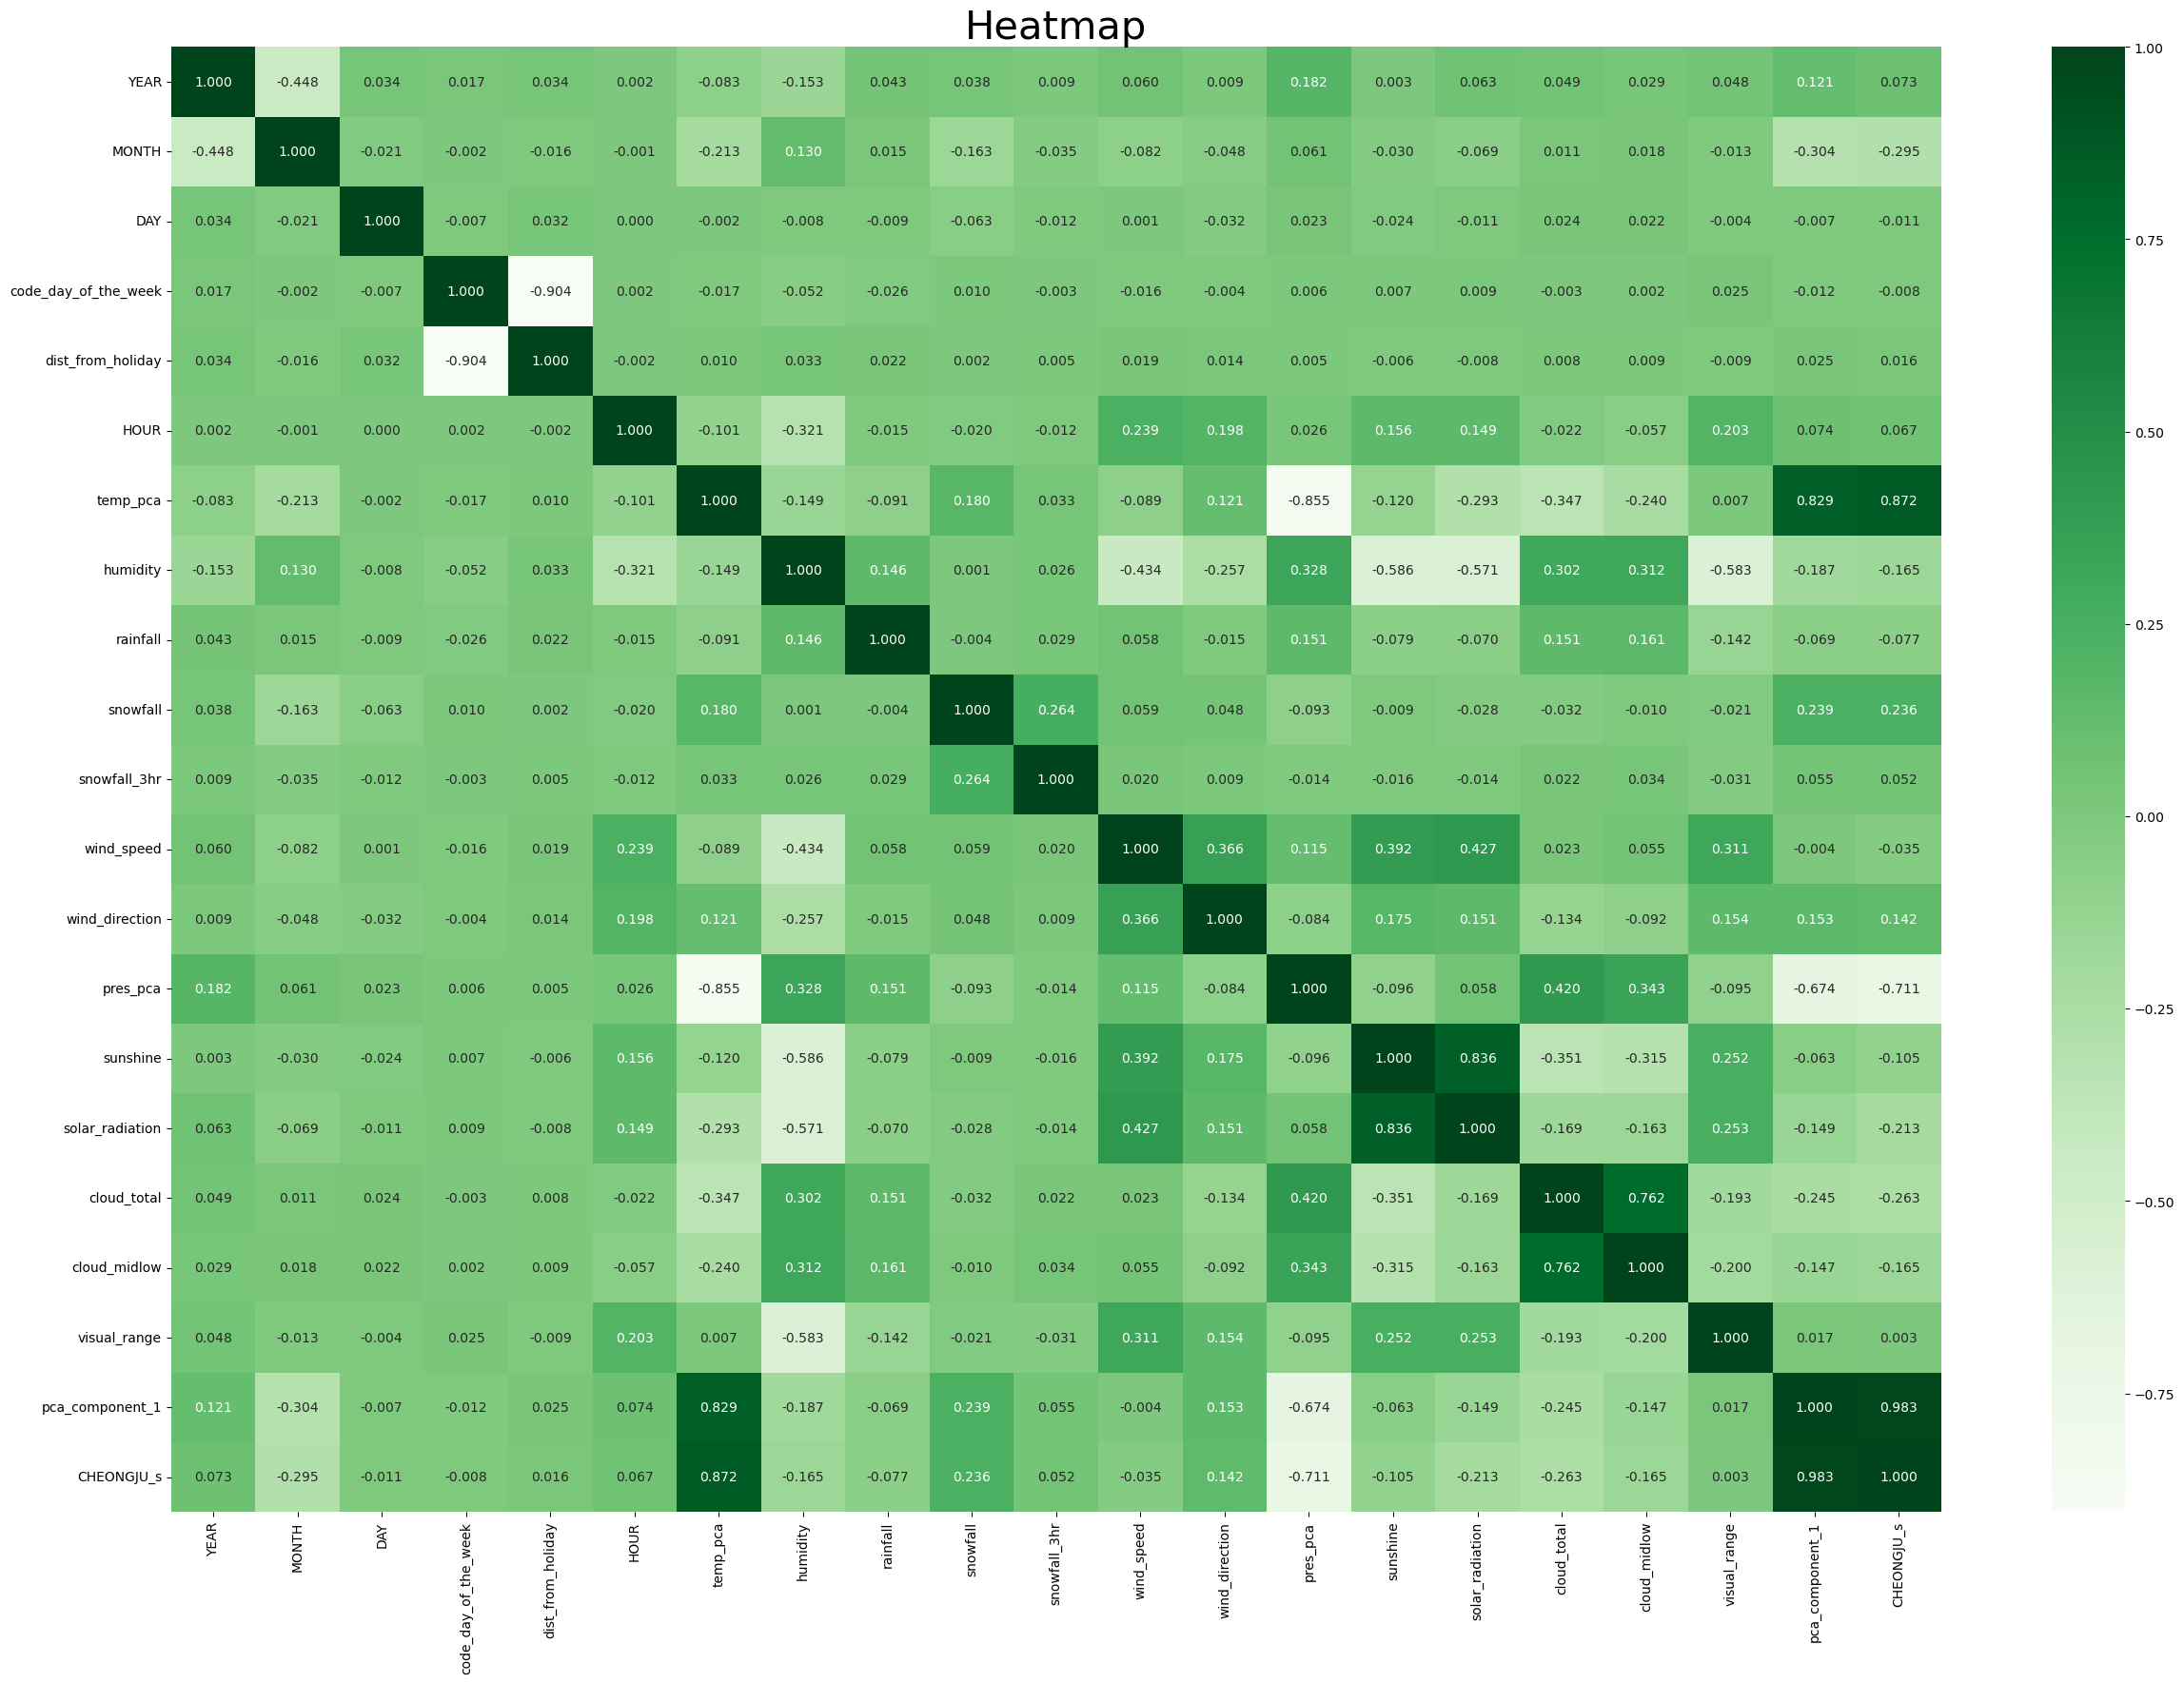

In [23]:
## Heatmap 분석
plt.figure(figsize=(30,20))
ax = sns.heatmap(df_corr, annot=True, fmt='.3f', cmap='Greens')
plt.title("Heatmap", fontsize=30)
plt.show()

In [24]:
# df_kdhc_heat_WD = df_kdhc_heat_WD.drop(["METER_DATE"], axis = 1)
# df_tar = df_kdhc_heat_WD
df_tar = df_kdhc_heat_WE

X = df_tar.drop([col_tar], axis=1)
Y = df_tar[[col_tar]]

In [25]:
trainSet, testSet = train_test_split(df_tar, test_size=0.3, shuffle=False)
print(trainSet.shape, testSet.shape)

(6586, 20) (2823, 20)


In [26]:
trainXX = trainSet.drop([col_tar],axis=1)
trainYY = trainSet[[col_tar]]

testXX = testSet.drop([col_tar],axis=1)
testYY = testSet[[col_tar]]

In [27]:
trainXXindex = trainXX.index
trainXXcolumns = trainXX.columns

trainYYindex = trainYY.index
trainYYcolumns = trainYY.columns

testXXindex = testXX.index
testXXcolumns = testXX.columns

testYYindex = testYY.index
testYYcolumns = testYY.columns

In [28]:
d_trainXX=pd.DataFrame(trainXX, index=trainXXindex, columns=trainXXcolumns)
# d_trainXX=pd.DataFrame(trainXX, index=trainXXindex, columns=trainXXcolumns)
d_trainYY=trainYY

#d_valX=pd.DataFrame(func_valSet, index=valXindex, columns=valXcolumns)
#d_valY=valY

d_testXX=pd.DataFrame(testXX, index=testXXindex, columns=testXXcolumns)
# d_testXX=pd.DataFrame(trainXX, index=testXXindex, columns=testXXcolumns)
d_testYY=testYY

In [29]:
params = {
    'learning_rate': 0.01,
    'objective': 'regression',
    'metric':'mae',
    'seed':42
}

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

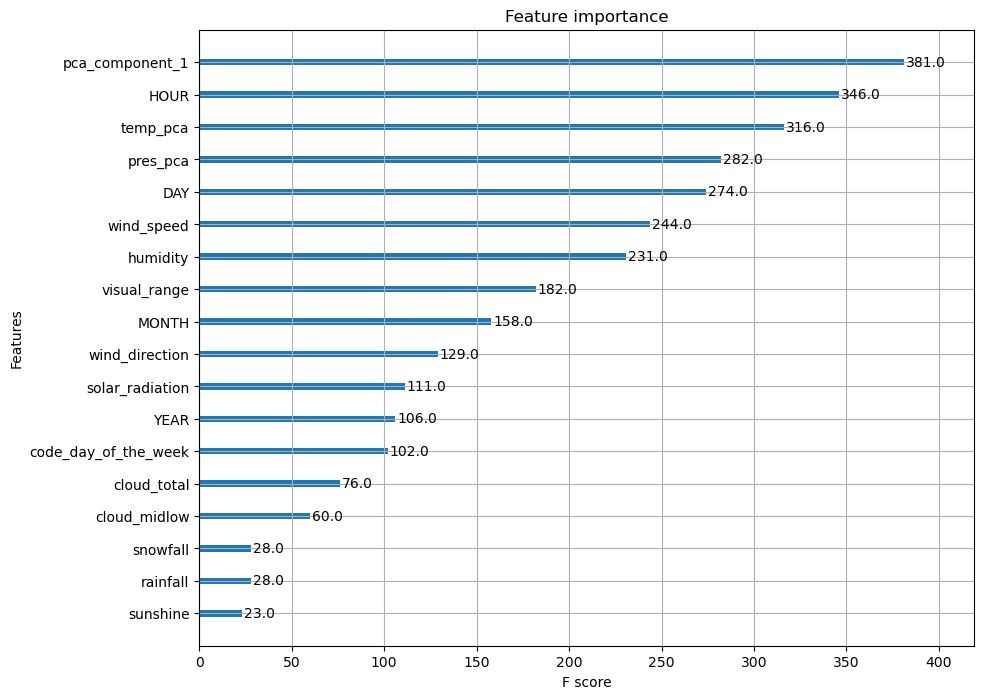

In [30]:
XGB_CJ = xgb.XGBRegressor(n_estimators = 1000)
XGB_CJ.fit(d_trainXX, d_trainYY
           , eval_set=[(d_testXX, d_testYY)]
           , early_stopping_rounds = 50, verbose = False)

## 주요 변수 판단
plot_importance(XGB_CJ)

In [31]:
XGB_pred = XGB_CJ.predict(d_testXX)
XGB_pred = np.reshape(XGB_pred,(-1,1))

In [32]:
d_actual = testYY.to_numpy()
d_actual = np.reshape(d_actual,(-1,1))

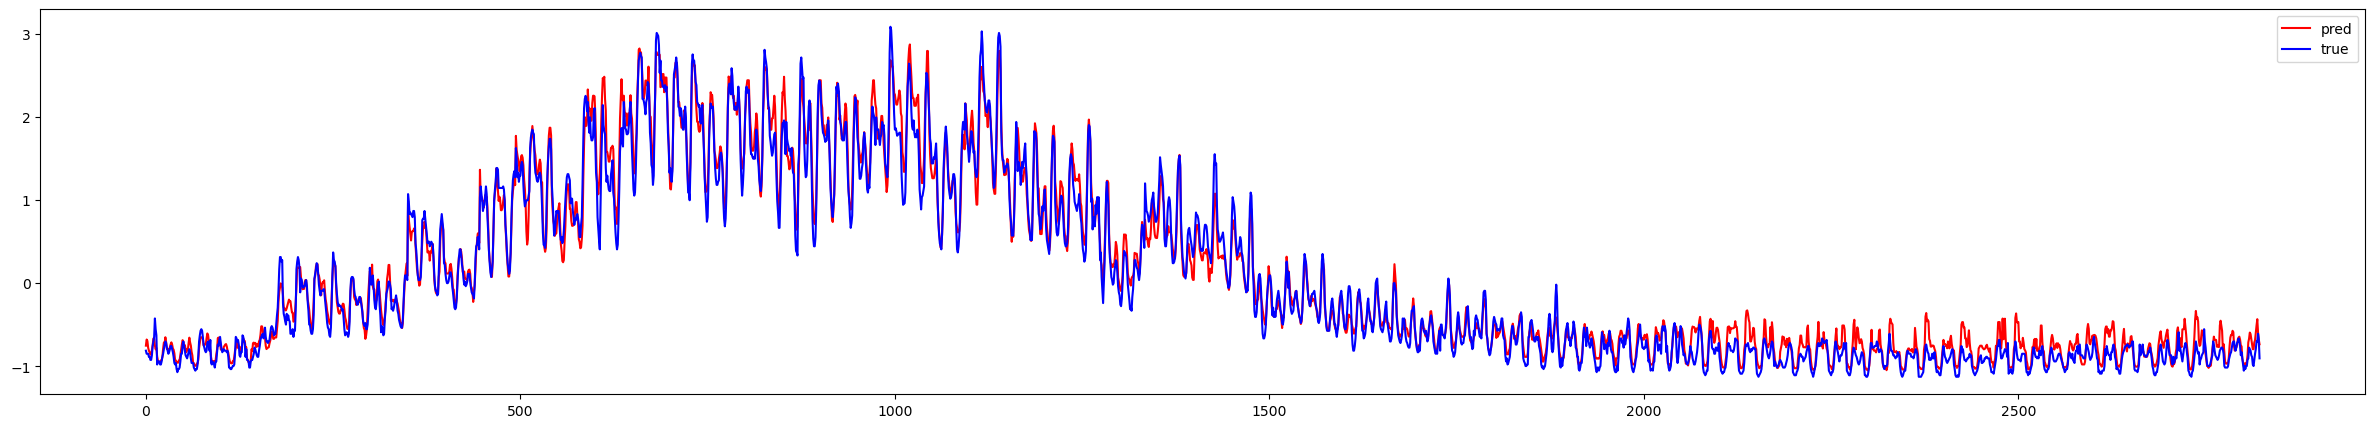

In [33]:
plt.figure(figsize=(30,5))
plt.plot(XGB_pred,color='red',label='pred')
plt.plot(d_actual,color='blue',label='true')
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import mean_absolute_percentage_error 
print('mean_absolute_percentage_error : ', mean_absolute_percentage_error(d_actual, XGB_pred))

from sklearn.metrics import mean_absolute_error
print('mean_absolute_error : ', mean_absolute_error(d_actual, XGB_pred))                                      

from sklearn.metrics import mean_squared_error
print('mean_squared_error : ', mean_squared_error(d_actual, XGB_pred))

from sklearn.metrics import r2_score   # model.score
print('r2_score : ', r2_score(d_actual, XGB_pred))

mean_absolute_percentage_error :  0.6558257210703484
mean_absolute_error :  0.12569304723578767
mean_squared_error :  0.027635803873505366
r2_score :  0.9760149577132463


In [35]:
print(trainXX.shape, trainYY.shape)
print(testXX.shape, testYY.shape)

(6586, 19) (6586, 1)
(2823, 19) (2823, 1)
